In [1]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
L = 13
H = hm.sparse_H(L)
# vals, vecs = la.eigh(H)

In [3]:
Z = np.zeros((2**L,2**L))
for i in range(L):
    Zi = 1
    for j in range(L):
        if (j==i): Zi = np.kron(Zi,hm.Z)
        else: Zi = np.kron(Zi,hm.I)
    Z += Zi

X = np.zeros((2**L,2**L))
for i in range(L):
    Xi = 1
    for j in range(L):
        if (j==i): Xi = np.kron(Xi,hm.X)
        else: Xi = np.kron(Xi,hm.I)
    X += Xi

Y = np.zeros((2**L,2**L), dtype=complex)
for i in range(L):
    Yi = 1
    for j in range(L):
        if (j==i): Yi = np.kron(Yi,hm.Y)
        else: Yi = np.kron(Yi,hm.I)
    Y += Yi
    
# print(Z@Z)
# vals, vecs = la.eigh(Z)
# print(vals)
    
S2 = X@X + Y@Y + Z@Z
# vals2, _ = la.eigh(S2)
# print(hm.chop(S2))
# print(hm.chop(vals2))
# print(hm.chop(np.sqrt(vals2+1)-1)/2)

In [4]:
Hsmal = hm.mat2list(H)[(int)(L/2)]
Zsmal = hm.mat2list(Z)[(int)(L/2)]
Ssmal = hm.mat2list(S2)[(int)(L/2)]

In [ ]:
# # eigs of Hsmal
# valsH, vecsH = la.eigh(Hsmal)
# for i, vec in enumerate(vecsH.T):
# #     a = (H@vec)
# #     a = a[np.absolute(vec) > .0001]
# #     a = a/vec[np.absolute(vec) > .0001]
# #     if np.all(np.isclose(a[0], a)): print("H:", a[0])
# #     else: print("not an eig of H")
# #     print("should be", valsH[i], '\n')
#     a = (vec.conj()@Hsmal@vec)
#     print(i, "H:", hm.chop(a), " should be", hm.chop(valsH[i]))

In [ ]:
# # expectations of S2 in eigs of Hsmal
# valsH, vecsH = la.eigh(Hsmal)
# Ss = []
# for i, vec in enumerate(vecsH.T):
#     a = (Ssmal@vec)
#     a = a[np.absolute(vec) > .0001]
#     a = a/vec[np.absolute(vec) > .0001]
#     if np.all(np.isclose(a[0], a)): 
#         print(i, "S:", hm.chop(a[0]), hm.chop(vec.conj()@Ssmal@vec))
#         Ss.append(a[0])
#     else: 
#         print(str(i) + " is not an eig of S", a[0], vec[np.absolute(vec) > .0001][np.argmax(np.absolute(a - a[0]))])
# #         Ss.append(None)
# #     print("should be", valsX[i], '\n')
# #     a = (vec.conj()@Zsmal@vec)
# #     print("z:", a)

In [ ]:
# # eigs of Ssmal
# valsS, vecsS = la.eigh(Ssmal)
# for i, vec in enumerate(vecsS.T):
# #     a = (H@vec)
# #     a = a[np.absolute(vec) > .0001]
# #     a = a/vec[np.absolute(vec) > .0001]
# #     if np.all(np.isclose(a[0], a)): print("H:", a[0])
# #     else: print("not an eig of H")
# #     print("should be", valsH[i], '\n')
#     a = (vec.conj()@Ssmal@vec)
#     print("S:", hm.chop(a))
# #     print(str(i) + " should be", valsH[i], '\n')

In [5]:
valsS, vecsS = la.eigh(Ssmal)
Sdiag = vecsS.conj().T@Hsmal@vecsS
# print(np.absolute(Sdiag))
# plt.matshow(np.absolute(Sdiag))
# plt.show()
vals = np.round(valsS).astype('int')
counts = np.bincount(vals)
mask = (vals == np.argmax(counts))
# plt.matshow(np.absolute(Sdiag)[mask][:,mask])
# plt.show()

In [6]:
Htiny = (vecsS.conj().T@Hsmal@vecsS)[mask][:,mask]
valsH, vecsH = la.eigh(Htiny)
print(hm.chop(valsH))
print(valsH)

[-9.    -8.848 -8.689 -8.677 -8.452 -8.257 -8.159 -8.063 -7.935 -7.886
 -7.842 -7.725 -7.618 -7.497 -7.477 -7.382 -7.204 -7.179 -7.035 -7.034
 -6.989 -6.877 -6.853 -6.773 -6.716 -6.644 -6.58  -6.531 -6.503 -6.464
 -6.453 -6.312 -6.275 -6.255 -6.231 -6.115 -6.083 -6.068 -6.045 -5.988
 -5.965 -5.929 -5.853 -5.831 -5.726 -5.691 -5.644 -5.632 -5.554 -5.532
 -5.508 -5.473 -5.452 -5.406 -5.372 -5.331 -5.3   -5.246 -5.234 -5.197
 -5.175 -5.126 -5.073 -5.014 -4.974 -4.948 -4.928 -4.919 -4.884 -4.838
 -4.787 -4.755 -4.701 -4.665 -4.634 -4.613 -4.578 -4.511 -4.492 -4.472
 -4.427 -4.422 -4.393 -4.352 -4.336 -4.302 -4.267 -4.248 -4.22  -4.202
 -4.168 -4.136 -4.128 -4.037 -4.013 -3.999 -3.975 -3.934 -3.918 -3.905
 -3.883 -3.816 -3.787 -3.766 -3.739 -3.727 -3.678 -3.659 -3.651 -3.587
 -3.574 -3.532 -3.516 -3.48  -3.457 -3.451 -3.399 -3.391 -3.381 -3.364
 -3.338 -3.309 -3.263 -3.238 -3.22  -3.19  -3.166 -3.15  -3.13  -3.112
 -3.082 -3.059 -3.032 -3.014 -3.003 -2.977 -2.948 -2.934 -2.904 -2.866
 -2.84

(array([  4.,   1.,   4.,   4.,   4.,   6.,   6.,   6.,   9.,  10.,   9.,
         10.,  12.,  12.,  12.,  14.,  16.,  19.,  16.,  15.,  20.,  18.,
         19.,  21.,  19.,  19.,  21.,  19.,  18.,  20.,  15.,  16.,  19.,
         16.,  14.,  12.,  12.,  12.,  10.,   9.,  10.,   9.,   6.,   6.,
          6.,   4.,   4.,   4.,   1.,   4.]),
 array([-8.9996175, -8.6396328, -8.2796481, -7.9196634, -7.5596787,
        -7.199694 , -6.8397093, -6.4797246, -6.1197399, -5.7597552,
        -5.3997705, -5.0397858, -4.6798011, -4.3198164, -3.9598317,
        -3.599847 , -3.2398623, -2.8798776, -2.5198929, -2.1599082,
        -1.7999235, -1.4399388, -1.0799541, -0.7199694, -0.3599847,
         0.       ,  0.3599847,  0.7199694,  1.0799541,  1.4399388,
         1.7999235,  2.1599082,  2.5198929,  2.8798776,  3.2398623,
         3.599847 ,  3.9598317,  4.3198164,  4.6798011,  5.0397858,
         5.3997705,  5.7597552,  6.1197399,  6.4797246,  6.8397093,
         7.199694 ,  7.5596787,  7.9196634,  8

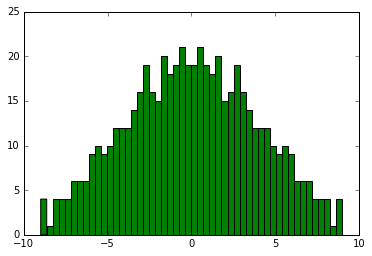

In [7]:
plt.hist(valsH, 50, facecolor='green')